## Limits on Heavy Neutrinos

This notebook plots the standard parameter space of heavy neutrinos under the assumption of single flavor dominance.

The data is pulled from [this spreadsheet](https://docs.google.com/spreadsheets/d/1p_fslIlThKMOThGl4leporUsogq9TmgXwILntUZOscg/edit?usp=sharing), and limits are drawn from digitized or shared data.



In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import *
from Nlimits import plot_tools
from Nlimits import hnl_tools


In [9]:
case_electron = hnl_tools.limits(flavor='e', invisible=False)
case_muon = hnl_tools.limits(flavor='mu', invisible=False)
case_tau = hnl_tools.limits(flavor='tau', invisible=False)

nuexps = ['t2k','t2k_lowmass', 'microboone_higgs', 'nomad',
            'argoneut','charm_2021','nomad','nutev','borexino_plestid',
            'charm','charmii', 'dune_berryman', 'dune_ballett','microboone','sk', 'ship']


## $|U_{e N}|^2$

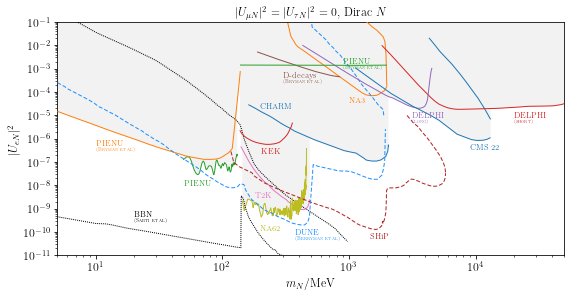

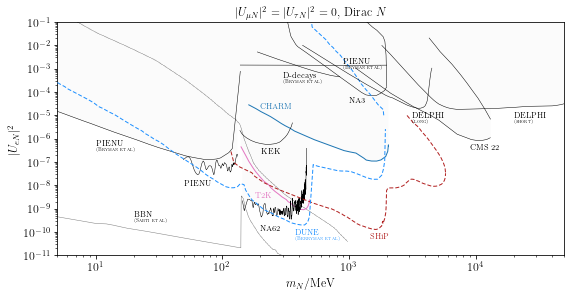

In [10]:
kwargs = {'xrange': (5,5e4),
        'yrange': (1e-11,1e-1),
        #
        'skip_ids': ['dune_ballett','fmmf','bebc'],
        #
        'title': fr"$|U_{{\mu N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$",
        #
        'new_color': {'bbn': 'black',
        'microboone_higgs': 'green',
        't2k_lowmass': 'blue',
        'dune_berryman': 'dodgerblue',
        'ship': 'firebrick'},
        #
        'new_dash': {'bbn': (1,1)},
        #
        'new_labelpos': {
                    'bbn': (20, 4.5e-10),
                    't2k': (180, 3e-9),
                    'na62': (200, 1.2e-10),
                    'na3': (1.e3, 3.5e-5),
                    'charm': (200, 2e-5),
                    'delphi_short': (2e4, 8e-6),
                    'pienu': (50, 1e-8),
                    'pienu_highmass': (900, 1.6e-3),
                    'pienu_lowmass': (10, 0.5e-6),
                    'de2_bryman_shrock': (300, 4e-4)}
        }


fig, ax = plot_tools.std_plot_limits(case_electron, **kwargs)
fig, ax = plot_tools.std_plot_limits(case_electron, color_only=nuexps, suffix='_nf03', **kwargs)


## $|U_{\mu N}|^2$

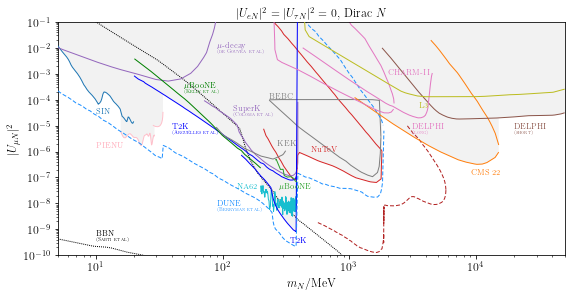

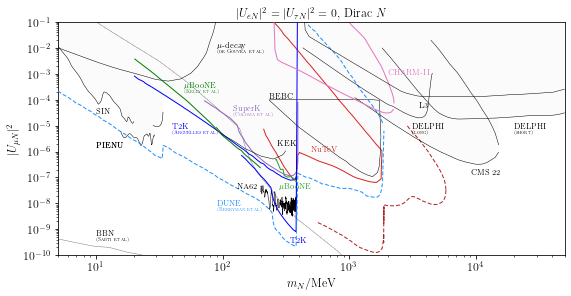

In [14]:
kwargs = {'xrange': (5,5e4),
                            #
                            'skip_ids': ['dune_ballett','fmmf'],
                            #
                            'title': fr"$|U_{{e N}}|^2 = |U_{{\tau N}}|^2 = 0$, Dirac $N$",
                            #
                            'new_color': {
                                'bbn': 'black',
                                'microboone_higgs': 'green',
                                'pienu': 'pink',
                                't2k': 'blue',
                                't2k_lowmass': 'blue',
                                'dune_berryman': 'dodgerblue',
                                'ship': 'firebrick'},
                            #
                            'new_dash': {'bbn': (1,1)},
                            #
                            'new_labelpos': {
                                'bbn': (10, 6e-10),
                                'bebc': (232, 1.15e-4),
                                'charmii': (2e3, 1e-3),
                                'dune_berryman': (90, 8e-9),
                                'delphi_short': (2e4, 8e-6),
                                'ewpo': (1e4, 2e-3),
                                'fmmf': (500, 1e-5),
                                'ktev': (300, 2e-6),
                                'kek': (270, 1.7e-6),
                                'lepton_universality': (1e4, 5e-4),
                                'muon_decays': (90, 1e-2),
                                'microboone': (280, 3.5e-8),
                                'microboone_higgs': (50, 3e-4),
                                'nutev': (500, 1e-6),
                                'na62': (130, 4e-8),
                                'pienu': (10, 1.5e-6),
                                'sk': (120,0.4e-4),
                                'sin': (10, 3e-5),
                                't2k_lowmass': (40,7.5e-6),
                            }
        }


fig, ax = plot_tools.std_plot_limits(case_muon, **kwargs)

fig, ax = plot_tools.std_plot_limits(case_muon, color_only=nuexps, suffix='_nf03', **kwargs)



## $|U_{\tau N}|^2$

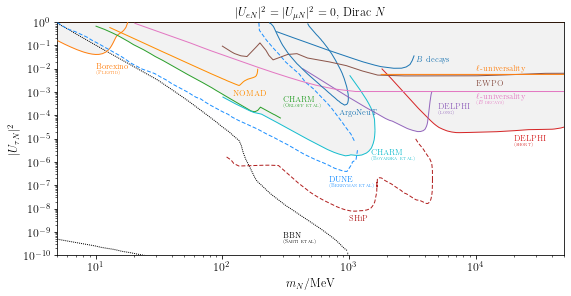

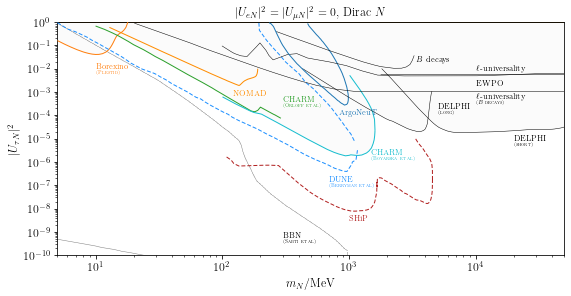

In [15]:
kwargs = {'xrange': (5,5e4),
                            'yrange': (1e-10,1),
                            #
                            'skip_ids': ['dune_ballett','fmmf','bebc','t2k'],
                            #
                            'title': fr"$|U_{{e N}}|^2 = |U_{{\mu N}}|^2 = 0$, Dirac $N$",
                            #
                            'new_color': {
                            't2k': 'grey',
                            'bbn': 'black',
                            'nomad': 'darkorange',
                            'dune_berryman': 'dodgerblue',
                            'ship': 'firebrick'}
                            ,
                            #
                            'new_dash': {
                                    'bbn': (1,1),
                                    't2k': (1,1)
                                    },
                            #
                            'new_labelpos': {'bbn': (300, 6e-10),
                                        'charm': (300, 4e-4),
                                        'charm_2021': (1.5e3, 2e-6),
                                        'dune_berryman': (0.7e3, 1.5e-7),
                                        'borexino_plestid': (10,1e-2),
                                        'lepton_universality_2': (1e4,8e-3),
                                        'b_decays': (3.4e3, 2e-2),
                                        'delphi_short': (2e4, 8e-6),
                                        'delphi_long': (5e3, 2e-4),
                                        'lepton_universality': (1e4, 5e-4),
                                        'ewpo': (1e4, 2e-3)
                                        }
}


fig, ax = plot_tools.std_plot_limits(case_tau, **kwargs)
fig, ax = plot_tools.std_plot_limits(case_tau,  color_only=nuexps, suffix='_nf03', **kwargs)


In [16]:
import pylatex
from pylatex.utils import NoEscape
import os
import requests

def add_plot(doc, case):
    # caption with the citations
    citations = fr"Constraints on {case.latexflavor} as a function of the HNL mass $m_N$. Limits shown: "
    names = sorted(case.limits.plot_label)
    for name in names:
        citations += fr'{name}~\cite{{{list(case.limits.reference[case.limits.plot_label == name])[0]}}}, '.replace('\\\\','')
    citations = citations[:-2]+'.'

    # figure
    with doc.create(pylatex.Figure(position='h!')) as latexfig:
        latexfig.add_image(f'../plots/U{case.flavor}N.pdf', width=NoEscape(r'1\textwidth'))
        latexfig.add_caption(NoEscape(citations))

# Basic document
def create_latex_doc(cases = [case_electron,case_muon,case_tau], PATH = 'tex_files/'):

    if not os.path.exists(PATH):
        os.makedirs(PATH)

    doc = pylatex.Document(f'{PATH}/std_plots', documentclass=NoEscape(r'revtex4-2'))

    for case in cases:
        add_plot(doc, case)

    with open(f'{PATH}/std_plots.bib','w', encoding='utf-8') as f:
        added_ids = []
        for case in cases:
            for ref in case.limits.reference:
                if not ref in added_ids:
                    response = requests.get(f"https://inspirehep.net/api/literature?q=texkeys:{ref}&format=bibtex")
                    if response.status_code == 200:
                        f.write((response.content).decode("utf-8") )
                        added_ids.append(ref)
                    else:
                        print(f"Could not find Inspire entry for texkey={ref}.")


    doc.append(pylatex.Command('bibliographystyle', arguments=NoEscape(r'apsrev4-1')))
    doc.append(pylatex.Command('bibliography', arguments=NoEscape(r'std_plots')))

    doc.generate_pdf(clean_tex=True)
    doc.generate_tex()

In [17]:
create_latex_doc()